#Importing the required Libraries  

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Loading dataset as follow:
"taxi_data" for the trip data of 2020 January month <br>
"climatic_data" for the weather data of 2020 January month

In [2]:
taxi_data = pd.read_parquet("/content/yellow_tripdata_2020-01.parquet")
climatic_data = pd.read_csv("/content/export.csv")

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


In [4]:
climatic_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
2,2020-01-03,7.6,6.7,8.3,NaN,NaN,NaN,8.4,NaN,1010.2,NaN
3,2020-01-04,8.2,6.7,9.4,NaN,NaN,NaN,5.7,NaN,1003.7,NaN
4,2020-01-05,4.6,2.8,7.2,NaN,NaN,NaN,8.2,NaN,1010.1,NaN


In [5]:
print(taxi_data.shape)
print(climatic_data.shape)

(6405008, 19)
(31, 11)


#Dropping columns from Climatic data to get rid off from Null values and unwanted data

In [6]:
taxi_data.drop(columns=['passenger_count', 'RatecodeID', 'VendorID', 'payment_type', 'airport_fee', 'store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'], inplace=True)

In [7]:
climatic_data.drop(columns=['prcp', 'snow', 'wdir', 'wpgt', 'tsun'], inplace=True)

In [8]:
climatic_data.head()

,date,tavg,tmin,tmax,wspd,pres
0,2020-01-01,3.6,1.7,5.0,17.3,1008.2
1,2020-01-02,4.7,0.6,8.9,12.4,1013.9
2,2020-01-03,7.6,6.7,8.3,8.4,1010.2
3,2020-01-04,8.2,6.7,9.4,5.7,1003.7
4,2020-01-05,4.6,2.8,7.2,8.2,1010.1


Before Data cleaning we get the Climate data with the following columns:

Date : Date of the weather in the following date<br>
tavg : Average Temperature in the following date<br>
tmin : Minimum Temperature of the day<br>
tmax : Maximum Temperature of the day<br>
wspd : Wind Speed reading of the day<br>
pres : Pressure Calculated for the following date

#Converting Climatic dataset "Date" column's datatype from 'date' to 'datetime'

In [9]:
# Convert timestamp column to date
climatic_data['date'] = pd.to_datetime(climatic_data['date'])

#Data Cleaning

In [10]:
# Data Cleaning
# Handle missing values
imputer = SimpleImputer(strategy='mean')
taxi_data['trip_distance'] = imputer.fit_transform(taxi_data[['trip_distance']])

In [11]:
# Feature Engineering
# Merge datasets
# Merge datasets using different column names for the date information
merged_data = pd.merge(taxi_data, climatic_data, left_on='tpep_pickup_datetime', right_on='date')

In [12]:
print(merged_data)

   tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  PULocationID  \
0            2020-01-01   2020-01-01 00:13:03           2.20            68   
1            2020-01-01   2020-01-01 01:08:55           1.43            48   
2            2020-01-01   2020-01-01 01:25:09           1.74           142   
3            2020-01-01   2020-01-01 01:45:06           1.35            48   
4            2020-01-01   2020-01-01 02:02:39           2.33           186   
..                  ...                   ...            ...           ...   
80           2020-01-31   2020-01-31 00:11:22           1.90           164   
81           2020-01-31   2020-01-31 00:08:13           1.20           114   
82           2020-01-31   2020-01-31 00:14:13           3.80           148   
83           2020-01-31   2020-01-31 00:00:52           0.00           170   
84           2020-01-31   2020-01-31 00:41:00          10.70            43   

    DOLocationID       date  tavg  tmin  tmax  wspd    pres  
0

#Calculating Trip Duration with the help of pickup time and dropoff time from Trip Data

In [13]:
# Calculate trip duration based on pickup and dropoff datetime
merged_data['pickup_datetime'] = pd.to_datetime(merged_data['tpep_pickup_datetime'])
merged_data['dropoff_datetime'] = pd.to_datetime(merged_data['tpep_dropoff_datetime'])
merged_data['trip_duration'] = (merged_data['dropoff_datetime'] - merged_data['pickup_datetime']).dt.total_seconds()

#Filling the NULL values with Zero

In [14]:
# Handle missing values by replacing them with the mean of each column
# Exclude datetime columns from imputation
numeric_columns = merged_data.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
merged_data[numeric_columns] = imputer.fit_transform(merged_data[numeric_columns])

#Splitting Dataset to get a input and output Variables

In [15]:
# Define features (X) and target variable (y)
X = merged_data.drop(columns=['pickup_datetime', 'dropoff_datetime', 'trip_duration'])
y = merged_data['trip_duration']

In [16]:
print(X)
print(y)

   tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  PULocationID  \
0            2020-01-01   2020-01-01 00:13:03           2.20          68.0   
1            2020-01-01   2020-01-01 01:08:55           1.43          48.0   
2            2020-01-01   2020-01-01 01:25:09           1.74         142.0   
3            2020-01-01   2020-01-01 01:45:06           1.35          48.0   
4            2020-01-01   2020-01-01 02:02:39           2.33         186.0   
..                  ...                   ...            ...           ...   
80           2020-01-31   2020-01-31 00:11:22           1.90         164.0   
81           2020-01-31   2020-01-31 00:08:13           1.20         114.0   
82           2020-01-31   2020-01-31 00:14:13           3.80         148.0   
83           2020-01-31   2020-01-31 00:00:52           0.00         170.0   
84           2020-01-31   2020-01-31 00:41:00          10.70          43.0   

    DOLocationID       date  tavg  tmin  tmax  wspd    pres  
0

In [17]:
# Scale numerical features
scaler = StandardScaler()
merged_data[['trip_distance', 'tavg']] = scaler.fit_transform(merged_data[['trip_distance', 'tavg']])

#Building different types of Models

In [18]:
#4. Model Building
def build_mlp_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    return model

def build_linear_regression_model(input_dim):
    model = Sequential([
        Dense(1, input_dim=input_dim)
    ])
    return model

def build_dnn_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    return model

#Training the Models that we have built

In [19]:
# 4. Model Training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Exclude timestamp columns before scaling
numeric_features = X_train.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime']).select_dtypes(include=[np.number])

In [21]:
# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(numeric_features)
X_val_scaled = scaler.transform(X_val[numeric_features.columns])

In [22]:
# Build models
mlp_model = build_mlp_model(X_train_scaled.shape[1])
mlp_model.add(keras.layers.Dense(1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
linear_regression_model = build_linear_regression_model(X_train_scaled.shape[1])
linear_regression_model.add(keras.layers.Dense(1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
dnn_model = build_dnn_model(X_train_scaled.shape[1])
dnn_model.add(keras.layers.Dense(1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))

#Compiling Models

In [23]:
mlp_model.compile(loss='mae', optimizer='adam')
linear_regression_model.compile(loss='mae', optimizer='adam')
dnn_model.compile(loss='mae', optimizer='adam')

#Training Models

In [24]:
# Train models with early stopping
mlp_history = mlp_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])
linear_regression_history = linear_regression_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])
dnn_history = dnn_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/100
3/3 [==============================] - 4s 254ms/step - loss: 12488.1025 - val_loss: 17558.9082
Epoch 2/100
3/3 [==============================] - 0s 75ms/step - loss: 12487.9424 - val_loss: 17558.7930
Epoch 3/100
3/3 [==============================] - 0s 93ms/step - loss: 12488.0361 - val_loss: 17558.6660
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 12487.6826 - val_loss: 17558.5371
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 12487.5049 - val_loss: 17558.4023
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 12487.4580 - val_loss: 17558.2656
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 12487.5537 - val_loss: 17558.1250
Epoch 8/100
3/3 [==============================] - 0s 52ms/step - loss: 12487.2422 - val_loss: 17557.9785
Epoch 9/100
3/3 [==============================] - 0s 31ms/step - loss: 12487.0977 - val_loss: 17557.8223
Epoch 10/100
3/3 [===========================

#Evaluating Models

In [25]:
# 5. Model Evaluation
mlp_val_loss = mlp_history.history['val_loss']
linear_regression_val_loss = linear_regression_history.history['val_loss']
dnn_val_loss = dnn_history.history['val_loss']

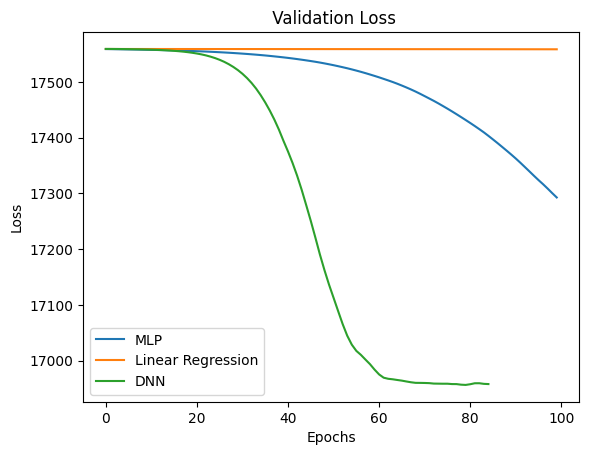

In [26]:
# Plot training loss vs validation loss
plt.plot(mlp_val_loss, label='MLP')
plt.plot(linear_regression_val_loss, label='Linear Regression')
plt.plot(dnn_val_loss, label='DNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' Validation Loss')
plt.legend()
plt.show()


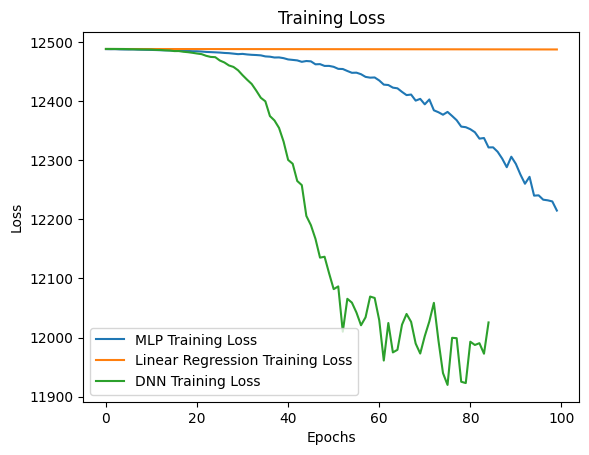

In [27]:
plt.plot(mlp_history.history['loss'], label='MLP Training Loss')
plt.plot(linear_regression_history.history['loss'], label='Linear Regression Training Loss')
plt.plot(dnn_history.history['loss'], label='DNN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

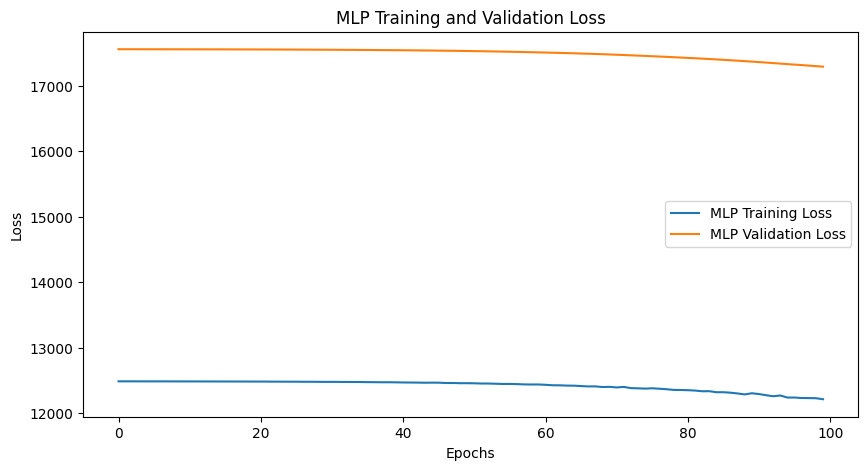

In [28]:
# Plot training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(mlp_history.history['loss'], label='MLP Training Loss')
plt.plot(mlp_history.history['val_loss'], label='MLP Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Training and Validation Loss')
plt.legend()
plt.show()

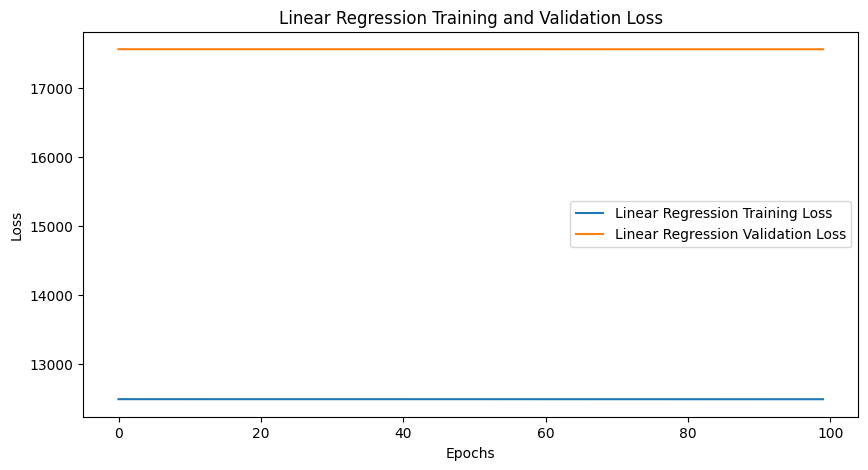

In [29]:
# Plot Linear Regression training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(linear_regression_history.history['loss'], label='Linear Regression Training Loss')
plt.plot(linear_regression_history.history['val_loss'], label='Linear Regression Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Linear Regression Training and Validation Loss')
plt.legend()
plt.show()

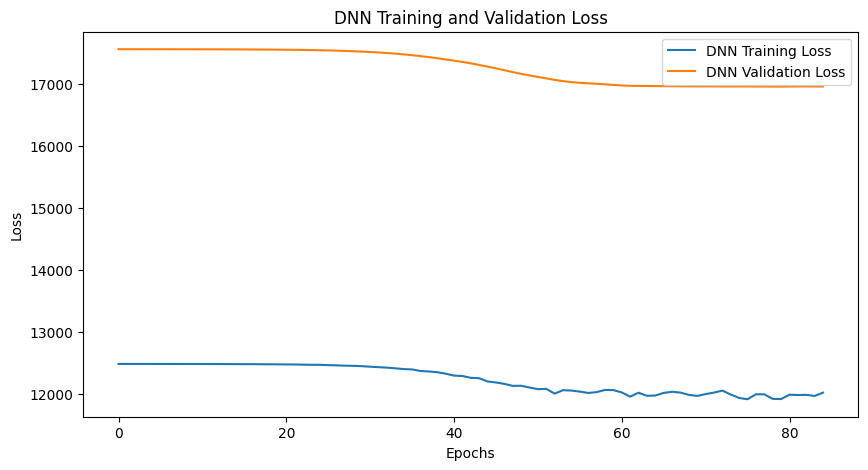

In [30]:
# Plot DNN training loss vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(dnn_history.history['loss'], label='DNN Training Loss')
plt.plot(dnn_history.history['val_loss'], label='DNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DNN Training and Validation Loss')
plt.legend()
plt.show()

In [31]:
predictions = dnn_model.predict(X_val_scaled)

# Calculate the loss on the validation dataset
loss = dnn_model.evaluate(X_val_scaled, y_val)

print("Validation Loss:", loss)

1/1 [==============================] - 0s 28ms/step - loss: 16958.1309
Validation Loss: 16958.130859375
